In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/Users/anastasia/Downloads/custom_sales_data.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product_ID             1000 non-null   object 
 1   Product_Name           1000 non-null   object 
 2   Category               1000 non-null   object 
 3   Subcategory            1000 non-null   object 
 4   Region                 1000 non-null   object 
 5   Country                1000 non-null   object 
 6   Units_Sold             1000 non-null   int64  
 7   Revenue                1000 non-null   float64
 8   Profit                 1000 non-null   float64
 9   Order_Date             1000 non-null   object 
 10  Ship_Date              1000 non-null   object 
 11  Customer_Satisfaction  1000 non-null   int64  
 12  Discount_Applied       1000 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 101.7+ KB


,Units_Sold,Revenue,Profit,Customer_Satisfaction,Discount_Applied
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,248.159000,65222.464670,11210.658170,2.953000,0.121550
std,140.864554,54410.330237,10648.756249,1.421553,0.072428
min,1.000000,179.160000,37.230000,1.000000,0.000000
25%,129.000000,19613.792500,2932.085000,2.000000,0.060000
50%,245.000000,50192.400000,8097.310000,3.000000,0.120000
75%,369.000000,100130.045000,16146.117500,4.000000,0.180000
max,500.000000,230582.040000,58031.600000,5.000000,0.250000


In [11]:
print(df.isnull().sum())

Product_ID               0
Product_Name             0
Category                 0
Subcategory              0
Region                   0
Country                  0
Units_Sold               0
Revenue                  0
Profit                   0
Order_Date               0
Ship_Date                0
Customer_Satisfaction    0
Discount_Applied         0
dtype: int64


In [23]:
total_profit_per_category = df.groupby("Category")["Profit"].sum()
print(total_profit_per_category)

Category
Electronics        3472127.05
Furniture          3585137.67
Office Supplies    4153393.45
Name: Profit, dtype: float64


In [33]:
avg_profit_by_category = df.groupby("Category")["Profit"].mean()
print(f"\nAverage Profit by Category:\n{avg_profit_by_category}")


Average Profit by Category:
Category
Electronics        11809.955952
Furniture          10864.053545
Office Supplies    11046.259176
Name: Profit, dtype: float64


In [39]:
df["Revenue_standardised"] = (df["Revenue"] - np.mean(df["Revenue"])) / np.std(df["Revenue"])
df[["Product_Name", "Revenue", "Revenue_standardised"]].head()

,Product_Name,Revenue,Revenue_standardised
0,Product 1,18330.00,-0.862261
1,Product 2,13888.00,-0.943941
2,Product 3,157486.65,1.696559
3,Product 4,9295.00,-1.028398
4,Product 5,43485.78,-0.399695


In [47]:
top_revenue_products = df.sort_values(by="Revenue", ascending=False).head(5)
print(f"\nTop Products by Revenue:\n{top_revenue_products}")


Top Products by Revenue:
    Product_ID Product_Name         Category Subcategory         Region  \
935      P0936  Product 936  Office Supplies     Binders  South America   
212      P0213  Product 213  Office Supplies        Pens         Africa   
690      P0691  Product 691        Furniture    Cabinets  North America   
682      P0683  Product 683      Electronics     Laptops         Africa   
664      P0665  Product 665      Electronics     Laptops  North America   

          Country  Units_Sold    Revenue    Profit  Order_Date   Ship_Date  \
935      Colombia         474  230582.04  51518.99  2023-06-20  2023-06-23   
212  South Africa         459  225038.52  57293.54  2023-03-16  2023-03-21   
690        Mexico         485  221111.50  31176.20  2023-01-27  2023-01-29   
682  South Africa         442  220062.96  43549.41  2023-08-25  2023-08-30   
664        Canada         465  213820.95  13139.39  2023-12-26  2024-01-06   

     Customer_Satisfaction  Discount_Applied  Revenue_

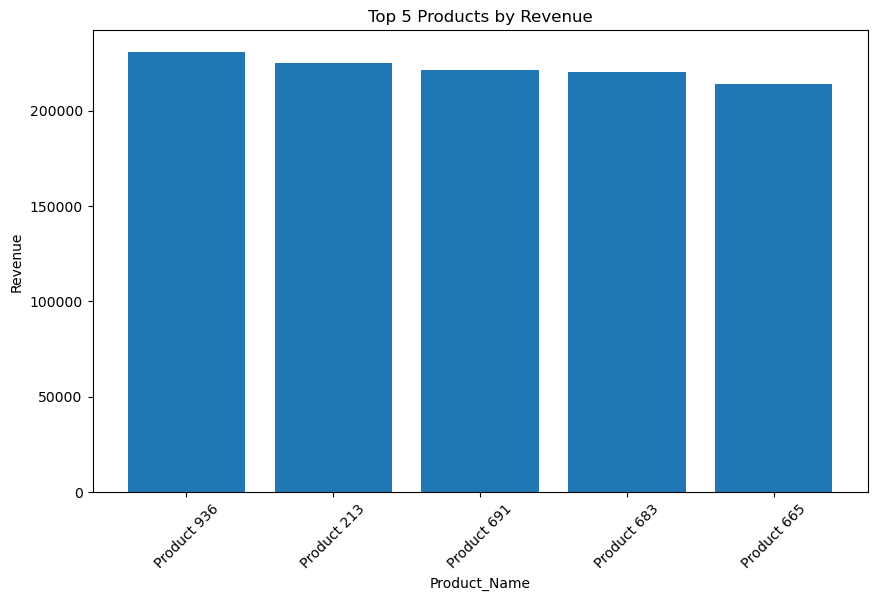

In [49]:
plt.figure(figsize=(10,6))
plt.bar(top_revenue_products["Product_Name"], top_revenue_products["Revenue"])
plt.xlabel("Product_Name")
plt.ylabel("Revenue")
plt.title("Top 5 Products by Revenue")
plt.xticks(rotation=45)
plt.show()

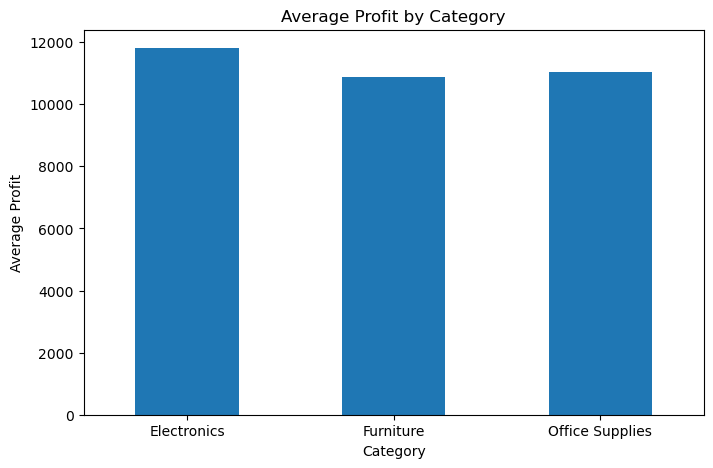

In [61]:
avg_profit_by_category.plot(kind="bar", figsize=(8,5), title="Average Profit by Category")
plt.xlabel("Category")
plt.ylabel("Average Profit")
plt.xticks(rotation=360)
plt.show()

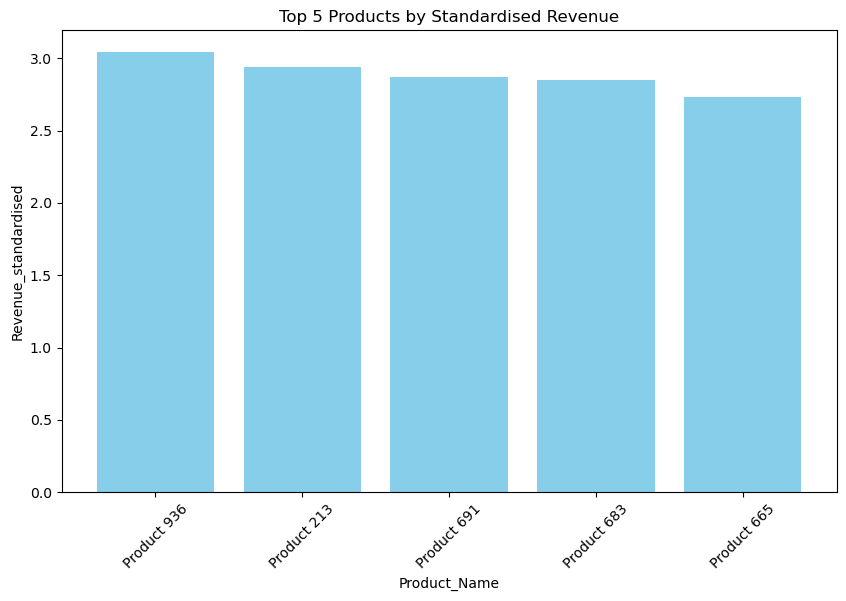

In [65]:
sorted_df = df.sort_values(by="Revenue_standardised", ascending=False)
top_5 = sorted_df.head(5)
bottom_5 = sorted_df.tail(5)

plt.figure(figsize=(10,6))
plt.bar(top_5["Product_Name"], top_5["Revenue_standardised"], color="skyblue")
plt.xlabel("Product_Name")
plt.ylabel("Revenue_standardised")
plt.title("Top 5 Products by Standardised Revenue")
plt.xticks(rotation=45)
plt.show()
        

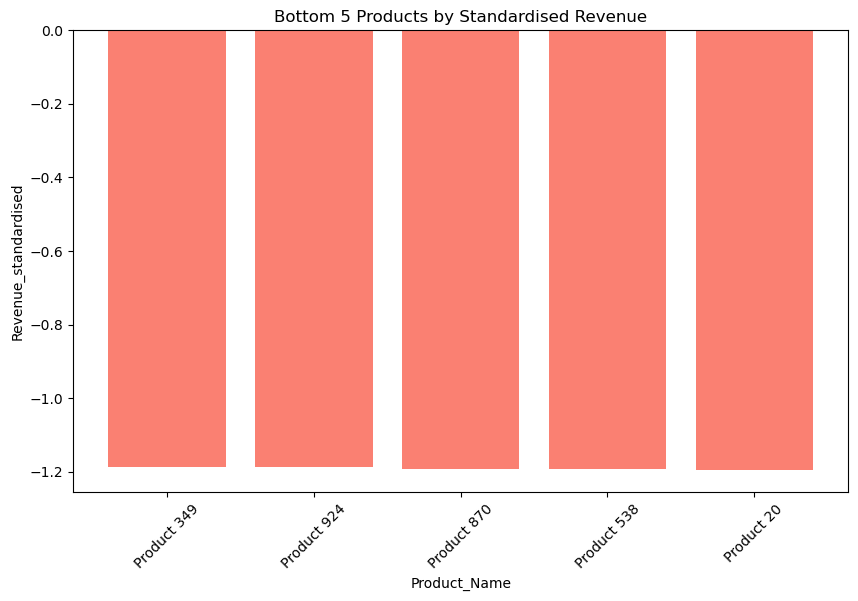

In [73]:
plt.figure(figsize=(10,6))
plt.bar(bottom_5["Product_Name"], bottom_5["Revenue_standardised"], color="salmon")
plt.xlabel("Product_Name")
plt.ylabel("Revenue_standardised")
plt.title("Bottom 5 Products by Standardised Revenue")
plt.xticks(rotation=45)
plt.show()

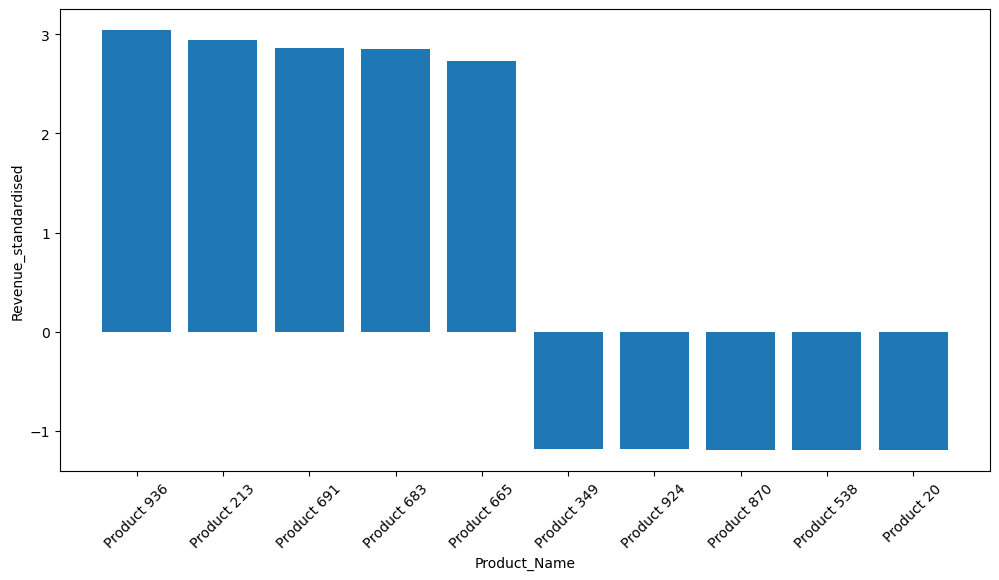

In [75]:
combined_df = pd.concat([top_5, bottom_5])
plt.figure(figsize=(12,6))
plt.bar(combined_df["Product_Name"], combined_df["Revenue_standardised"])
plt.xlabel("Product_Name")
plt.ylabel("Revenue_standardised")
plt.xticks(rotation=45)
plt.show()